# Import Libs

In [1]:
import pandas as pd
import numpy as np
from causalimpact import CausalImpact
from causalimpact.misc import standardize
import matplotlib
import seaborn as sns
import requests as r
from statsmodels.tsa.seasonal import seasonal_decompose
import tensorflow_probability as tfp
import tensorflow as tf
import datetime
%matplotlib inline
from statsmodels.tsa.stattools import grangercausalitytests
# add some basic matplotlib defaults
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (15, 6)
# set plot size and type to ggplot
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

In [7]:
tfd = tfp.distributions

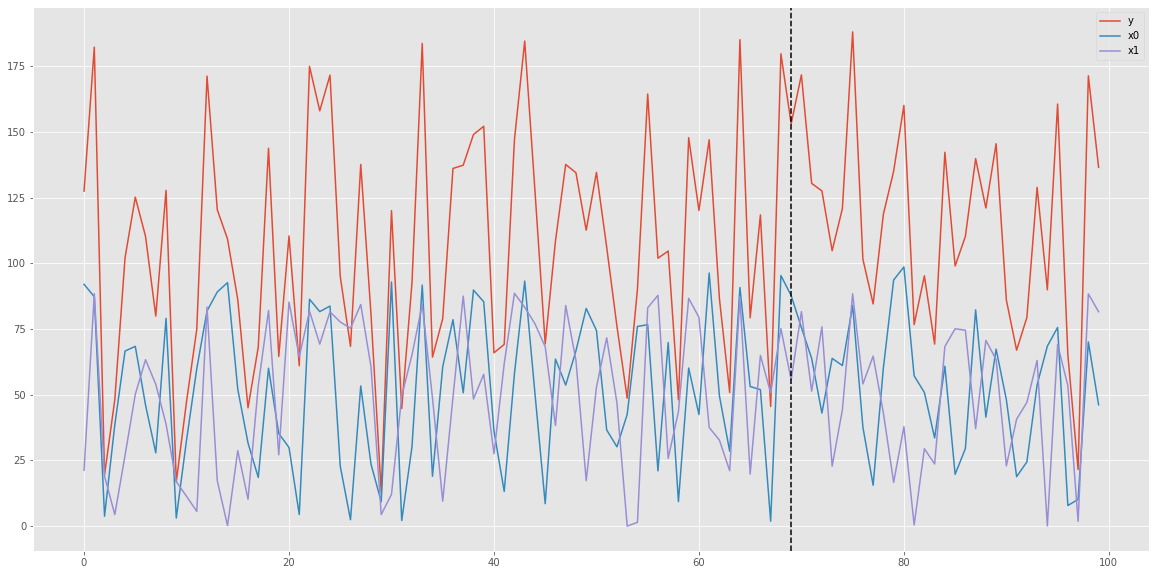

In [83]:


# This is an example presented in Google's R code.
# Uses TensorFlow Probability to simulate a random walk process.
observed_stddev, observed_initial = (tf.convert_to_tensor(value=1, dtype=tf.float32),
                                     tf.convert_to_tensor(value=0., dtype=tf.float32))
level_scale_prior = tfd.LogNormal(loc=tf.math.log(0.05 * observed_stddev), scale=1, name='level_scale_prior')
initial_state_prior = tfd.MultivariateNormalDiag(loc=observed_initial[..., tf.newaxis], scale_diag=(tf.abs(observed_initial) + observed_stddev)[..., tf.newaxis], name='initial_level_prior')
ll_ssm = tfp.sts.LocalLevelStateSpaceModel(100, initial_state_prior=initial_state_prior, level_scale=level_scale_prior.sample())
ll_ssm_sample = np.squeeze(ll_ssm.sample().numpy())

x0 = 100 * np.random.rand(100)
x1 = 90 * np.random.rand(100)
y = 1.2 * x0 + 0.9 * x1 + ll_ssm_sample
y[70:] += 10
data = pd.DataFrame({'x0': x0, 'x1': x1, 'y': y}, columns=['y', 'x0', 'x1'])

data.plot()
plt.axvline(69, linestyle='--', color='k')
plt.legend();



In [84]:
normed_data, _ = standardize(data.astype(np.float32))

# Test

In [4]:
from causalimpact.misc import standardize


In [22]:
data

,y,x0,x1
0,49.004614,21.312925,26.316717
1,105.562158,73.698586,19.289107
2,90.209082,71.592026,4.983103
3,95.870525,43.049439,49.282904
4,150.719748,66.557889,79.014872
...,...,...,...
95,200.081674,99.179747,80.684526
96,146.035580,80.948160,44.925802
97,122.304895,88.574536,8.413297
98,151.210857,90.817472,37.617563


In [ ]:
normed_data, _ = standardize(data.astype(np.float32))

In [14]:
obs_data = normed_data.iloc[:70, 0]

linear_level = tfp.sts.LocalLinearTrend(observed_time_series=obs_data)
linear_reg = tfp.sts.LinearRegression(design_matrix=normed_data.iloc[:, 1:].values.reshape(-1, normed_data.shape[1] -1))
month_season = tfp.sts.Seasonal(num_seasons=4, num_steps_per_season=1, observed_time_series=obs_data, name='Month')
year_season = tfp.sts.Seasonal(num_seasons=52, observed_time_series=obs_data, name='Year')
model = tfp.sts.Sum([linear_level, linear_reg, month_season, year_season], observed_time_series=obs_data)

pre_period = [0, 69]
post_period = [70, 99]

ci = CausalImpact(data, pre_period, post_period, model=model)

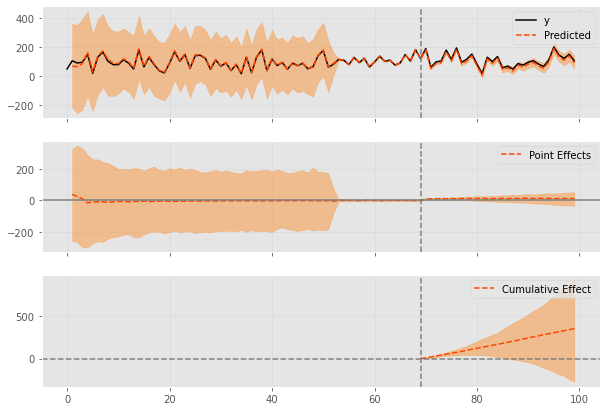

In [15]:
ci.plot()

In [20]:
 print(ci.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    109.82             3294.68
Prediction (s.d.)         98.04 (11.0)       2941.26 (329.91)
95% CI                    [79.85, 122.96]    [2395.49, 3688.72]

Absolute effect (s.d.)    11.78 (11.0)       353.42 (329.91)
95% CI                    [-13.13, 29.97]    [-394.04, 899.19]

Relative effect (s.d.)    12.02% (11.22%)    12.02% (11.22%)
95% CI                    [-13.4%, 30.57%]   [-13.4%, 30.57%]

Posterior tail-area probability p: 0.06
Posterior prob. of a causal effect: 94.31%

For more details run the command: print(impact.summary('report'))


### Test Real Data

In [21]:
df = pd.read_csv(r'C:\Users\brand\OneDrive\Documents\grad-school\pui\kim-fox-effect-revisited\data\final_monthly_data.csv', parse_dates=['case_date'], index_col="case_date")

In [142]:
normed_data = df['charges_f'].astype(np.float32).reset_index().drop(columns="case_date")

In [138]:
normed_data = standardize(normed_data)

In [143]:
obs_data = normed_data[normed_data.index <= 34]

In [144]:
trend = tfp.sts.LocalLinearTrend(observed_time_series=obs_data)
seasonal = tfp.sts.Seasonal(
  num_seasons=12, observed_time_series=obs_data)
model = tfp.sts.Sum([trend, seasonal], observed_time_series=obs_data)

#PRE_PERIOD = ['2014-01-01', '2016-11-01']
#POST_PERIOD = ['2016-12-01', '2018-12-01']

In [131]:
co2_forecast_dist = tfp.sts.forecast(
    model,
    observed_time_series=,
    parameter_samples=q_samples_co2_,
    num_steps_forecast=num_forecast_steps)

,charges_f
0,306.0
1,206.0
2,269.0
3,290.0
4,274.0
5,289.0
6,257.0
7,262.0
8,276.0
9,282.0


In [132]:
PRE_PERIOD = [0,34]
POST_PERIOD = [35, 59]

In [133]:
trend = tfp.sts.LocalLinearTrend(observed_time_series=obs_data)
seasonal = tfp.sts.Seasonal(
    num_seasons=12, observed_time_series=obs_data)
model = tfp.sts.Sum([trend, seasonal], observed_time_series=obs_data)

In [73]:
co2_forecast_dist = tfp.sts.forecast(
    model,
    observed_time_series=,
    parameter_samples=q_samples_co2_,
    num_steps_forecast=num_forecast_steps)

In [141]:
ci = CausalImpact(normed_data , PRE_PERIOD, POST_PERIOD, model=model,)

C:\Users\brand\anaconda3\lib\site-packages\pandas\core\internals\construction.py:309: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


ValueError: Input response must have more than 3 non-null points at least.

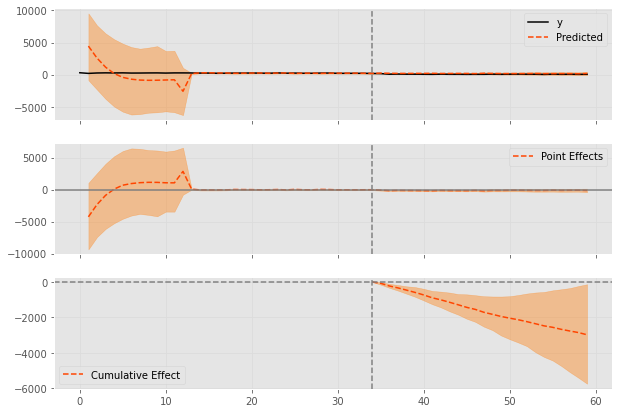

In [136]:
ci.plot()

In [137]:
print(ci.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    74.4               1860.0
Prediction (s.d.)         193.56 (62.79)     4838.91 (1569.67)
95% CI                    [62.52, 308.64]    [1563.1, 7716.09]

Absolute effect (s.d.)    -119.16 (62.79)    -2978.91 (1569.67)
95% CI                    [-234.24, 11.88]   [-5856.09, 296.9]

Relative effect (s.d.)    -61.56% (32.44%)   -61.56% (32.44%)
95% CI                    [-121.02%, 6.14%]  [-121.02%, 6.14%]

Posterior tail-area probability p: 0.03
Posterior prob. of a causal effect: 96.9%

For more details run the command: print(impact.summary('report'))
